# **Assignment - 2 Deep Convolutional Neural Network - Image Recognition**

Loading all the required libraries and functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

Importing the JSON Activation Code

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikhilkumarsampath","key":"d0fefbe885160a8c8b8d0f78f9f8933b"}'}

Setting the Directory

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading the Data

In [4]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:18<00:00, 47.1MB/s]
100% 812M/812M [00:18<00:00, 45.7MB/s]


Unzipping the Data

In [5]:
!unzip -qq dogs-vs-cats.zip

Unzipping Train Data

In [6]:
!unzip -qq train.zip

Creating directory named cats vs dogs small to store the images into 3 subsets named train, validation and test

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Data Pre-Processing

Using image_dataset_from_directory to read images

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Viewing the shape of the images

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Building the model

Instantiating a small convnet for dogs vs. cats classification

## ***Model - 1 MaxPooling Operation with Increase in filters from 32 to 512 in 5 Input Layers***

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)

## ***Summary of Model - 1***

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

Training the Model

In [ ]:
# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Fitting/Running the Model
Model_1 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 17s 112ms/step - loss: 0.6971 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 4s 104ms/step - loss: 0.6921 - accuracy: 0.5230 - val_loss: 0.6911 - val_accuracy: 0.5020
Epoch 3/30
32/32 [==============================] - 3s 75ms/step - loss: 0.6890 - accuracy: 0.5630 - val_loss: 0.6812 - val_accuracy: 0.5140
Epoch 4/30
32/32 [==============================] - 3s 75ms/step - loss: 0.6727 - accuracy: 0.5860 - val_loss: 0.6679 - val_accuracy: 0.5760
Epoch 5/30
32/32 [==============================] - 3s 75ms/step - loss: 0.6498 - accuracy: 0.6110 - val_loss: 0.6798 - val_accuracy: 0.5700
Epoch 6/30
32/32 [==============================] - 3s 98ms/step - loss: 0.6346 - accuracy: 0.6280 - val_loss: 0.7027 - val_accuracy: 0.6200
Epoch 7/30
32/32 [==============================] - 3s 75ms/step - loss: 0.6217 - accuracy: 0.6650 - val_loss: 0.6413 - val_accuracy: 0.6560
Epoch 8/30

Looking at the visuals of the Training and Validation Accuracy/Loss

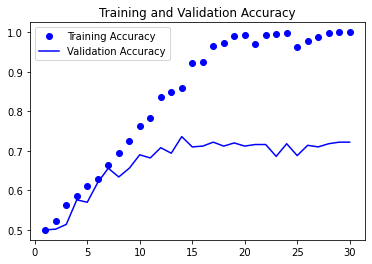

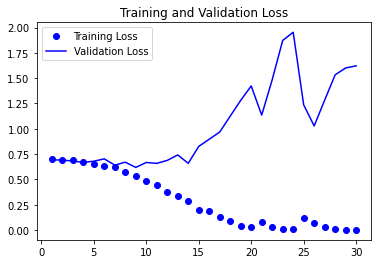

In [ ]:
accuracy = Model_1.history["accuracy"]
val_accuracy = Model_1.history["val_accuracy"]

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_1 on test set

In [ ]:
test_model = keras.models.load_model("model1.keras")
Model1_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

16/16 [==============================] - 1s 31ms/step - loss: 0.6447 - accuracy: 0.6140
Loss: 0.645
Accuracy: 0.614


## ***Using Measures to Avoid Overfitting***

### ***Data Augmentation***

In [7]:
# To deprecate warnings that are making the output look clumsy

import logging
logging.getLogger('tensorflow').disabled = True

Using few of the techniques such as random flip, random zoom, random rotation so as to create augmented versions of the image

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

Looking at the augmented images

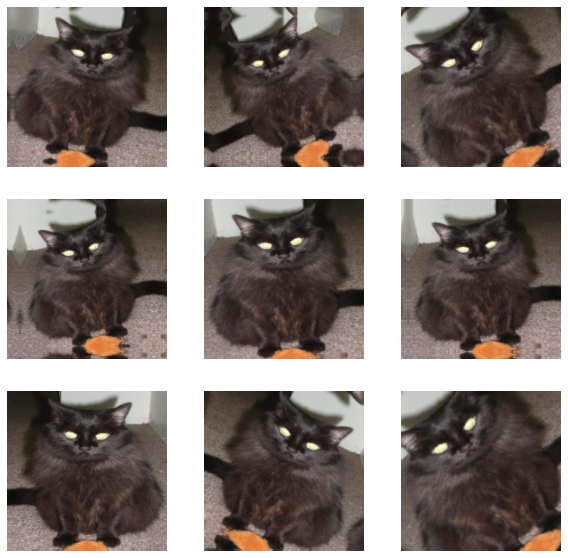

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

## ***Model - 2 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5***

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

Running the Model with callbacks being set to Model Checkpoint

In [ ]:
# Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss")


Model_2 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 16s 301ms/step - loss: 0.7048 - accuracy: 0.4950 - val_loss: 0.6924 - val_accuracy: 0.5040
Epoch 2/30
32/32 [==============================] - 8s 245ms/step - loss: 0.6936 - accuracy: 0.5010 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 9s 263ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6882 - val_accuracy: 0.6080
Epoch 4/30
32/32 [==============================] - 8s 240ms/step - loss: 0.6869 - accuracy: 0.5690 - val_loss: 0.7126 - val_accuracy: 0.5140
Epoch 5/30
32/32 [==============================] - 8s 227ms/step - loss: 0.6958 - accuracy: 0.5290 - val_loss: 0.6750 - val_accuracy: 0.6060
Epoch 6/30
32/32 [==============================] - 7s 224ms/step - loss: 0.6705 - accuracy: 0.6120 - val_loss: 0.6858 - val_accuracy: 0.5640
Epoch 7/30
32/32 [==============================] - 9s 260ms/step - loss: 0.6704 - accuracy: 0.5790 - val_loss: 0.6574 - val_accuracy: 0.6000
Epoch

Visualizing the Training and Validation Accuracy/Loss

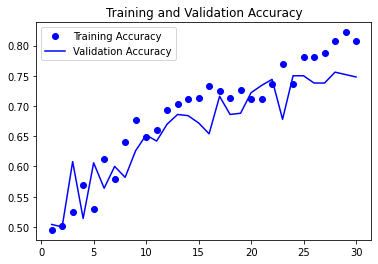

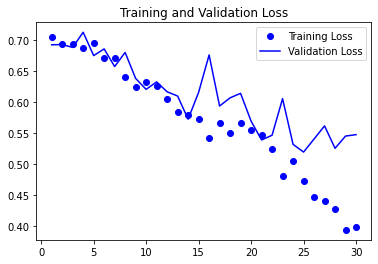

In [ ]:
accuracy = Model_2.history["accuracy"]
val_accuracy = Model_2.history["val_accuracy"]

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_2 on the test set

In [ ]:
test_model = keras.models.load_model("model2.keras")
Model2_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

16/16 [==============================] - 1s 29ms/step - loss: 0.6010 - accuracy: 0.7120
Loss: 0.601
Accuracy: 0.712


Compared to Model_1 we can clearly see that there is an increase of nearly 10% in the accuracy of the Model_2 which used augmented images to train itself and learn the naturalities from the image.

## ***Model - 3 MaxPooling Operation with Increase in filters from 32 to 512 in 6 Input Layers with the use of Augmented Images and Dropout rate of 0.5***

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

Running the Model with callbacks being set to Model Checkpoint

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.keras",
            save_best_only= True,
            monitor= "val_loss")


# Model Fit
Model_3 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 24s 210ms/step - loss: 0.6957 - accuracy: 0.4760 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 7s 211ms/step - loss: 0.6906 - accuracy: 0.5270 - val_loss: 0.8031 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 6s 191ms/step - loss: 0.6913 - accuracy: 0.5520 - val_loss: 0.6805 - val_accuracy: 0.6100
Epoch 4/30
32/32 [==============================] - 7s 219ms/step - loss: 0.6830 - accuracy: 0.5800 - val_loss: 0.6780 - val_accuracy: 0.5360
Epoch 5/30
32/32 [==============================] - 6s 192ms/step - loss: 0.6670 - accuracy: 0.6080 - val_loss: 0.6359 - val_accuracy: 0.6500
Epoch 6/30
32/32 [==============================] - 7s 217ms/step - loss: 0.6591 - accuracy: 0.6370 - val_loss: 0.6581 - val_accuracy: 0.6640
Epoch 7/30
32/32 [==============================] - 7s 217ms/step - loss: 0.6389 - accuracy: 0.6590 - val_loss: 0.6227 - val_accuracy: 0.6480
Epoch

Visualizing the Training and Validation Accuracy/Loss



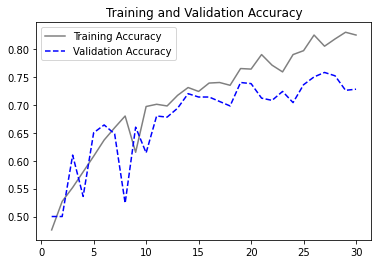

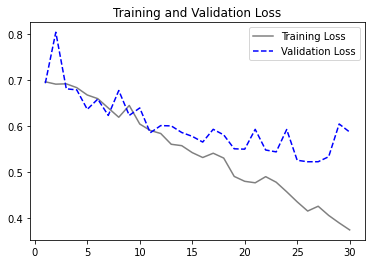

In [ ]:
accuracy = Model_3.history["accuracy"]
val_accuracy = Model_3.history["val_accuracy"]

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_3 on the test set

In [ ]:
best_model = keras.models.load_model("model3.keras")
Model3_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

16/16 [==============================] - 1s 26ms/step - loss: 0.6090 - accuracy: 0.6920
Loss: 0.609
Accuracy: 0.692


## ***Model - 4 MaxPooling Operation with Increase in filters from 64 to 1024 in 5 Input Layers with the use of Augmented Images and Dropout rate of 0.6***

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.6)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 87, 87, 128)       73856     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model4.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_4 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/30
32/32 [==============================] - 16s 291ms/step - loss: 0.7226 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 8s 227ms/step - loss: 0.6936 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 9s 258ms/step - loss: 0.6936 - accuracy: 0.5020 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 8s 254ms/step - loss: 0.6937 - accuracy: 0.4900 - val_loss: 0.6926 - val_accuracy: 0.5940
Epoch 5/30
32/32 [==============================] - 7s 216ms/step - loss: 0.6903 - accuracy: 0.5300 - val_loss: 0.6990 - val_accuracy: 0.5020
Epoch 6/30
32/32 [==============================] - 8s 252ms/step - loss: 0.6916 - accuracy: 0.5340 - val_loss: 0.6917 - val_accuracy: 0.5200
Epoch 7/30
32/32 [==============================] - 8s 248ms/step - loss: 0.6923 - accuracy: 0.5460 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch

Visualizing the Training and Validation Accuracy/Loss

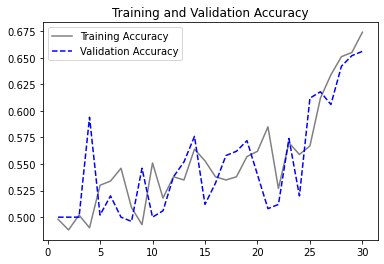

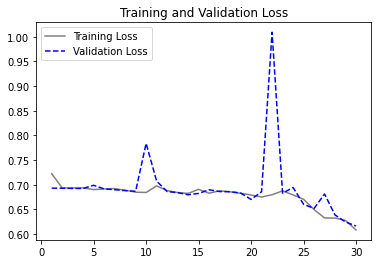

In [ ]:
accuracy = Model_4.history["accuracy"]
val_accuracy = Model_4.history["val_accuracy"]

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_4 on the test set

In [ ]:
best_model = keras.models.load_model("model4.keras")
Model4_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

16/16 [==============================] - 1s 31ms/step - loss: 0.6664 - accuracy: 0.6520
Loss: 0.666
Accuracy: 0.652


### ***To answer the first question we did try to build 4 models with the training sample being 1000, out of the 4 models built we could see that model 2 was having the highest accuracy around 71% and minimal loss around 60%.***

In [ ]:
Model_1 = (0.645, 0.614)
Model_2 = (0.601, 0.712)
Model_3 = (0.609,0.692)
Model_4 = (0.666, 0.652)

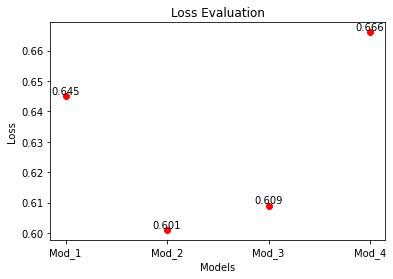

In [ ]:
Models = ("Mod_1","Mod_2","Mod_3","Mod_4")
Loss = (Model_1[0],Model_2[0],Model_3[0],Model_4[0])
Accuracy = (Model_1[1],Model_2[1],Model_3[1],Model_4[1])

plt.scatter(Models,Loss,color="red")
plt.title("Loss Evaluation")
plt.ylabel("Loss")
plt.xlabel("Models")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

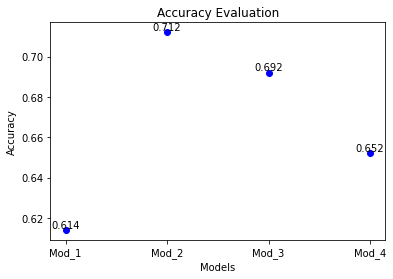

In [ ]:
plt.scatter(Models,Accuracy,color="blue")
plt.title("Accuracy Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Models")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

Model 2 was built using the augmented training samples which I think has led to provide more training data for the model to learn the characteristics of the images. So for the increased training samples model we will be using the augmented images again to train the model but with a training size of 2000 Samples and Validation and Test being 500 Each.

## ***Training Sample - 2000***

Creating directory named cats vs dogs to store the images into 3 subsets named train, validation and test

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Data Pre-Processing

Using image_dataset_from_directory to read images


In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Viewing the size of the images 

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Using few of the techniques such as random flip, random zoom, random rotation so as to create augmented versions of the image

In [ ]:
data_augmentation_1 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

## ***Model - 5 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 (Training Sample - 2000)***

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model5.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_5 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 17s 198ms/step - loss: 0.4870 - accuracy: 0.7660 - val_loss: 0.4957 - val_accuracy: 0.7640
Epoch 2/50
63/63 [==============================] - 12s 195ms/step - loss: 0.4691 - accuracy: 0.7830 - val_loss: 0.4621 - val_accuracy: 0.7840
Epoch 3/50
63/63 [==============================] - 13s 194ms/step - loss: 0.4539 - accuracy: 0.7900 - val_loss: 0.5484 - val_accuracy: 0.7520
Epoch 4/50
63/63 [==============================] - 12s 194ms/step - loss: 0.4262 - accuracy: 0.7960 - val_loss: 0.4427 - val_accuracy: 0.7840
Epoch 5/50
63/63 [==============================] - 12s 193ms/step - loss: 0.4228 - accuracy: 0.8025 - val_loss: 0.4547 - val_accuracy: 0.8020
Epoch 6/50
63/63 [==============================] - 12s 191ms/step - loss: 0.3976 - accuracy: 0.8090 - val_loss: 0.4624 - val_accuracy: 0.8080
Epoch 7/50
63/63 [==============================] - 13s 206ms/step - loss: 0.4214 - accuracy: 0.8035 - val_loss: 0.4787 - val_accuracy: 0.7920

Visualizing the Training and Validation Accuracy/Loss

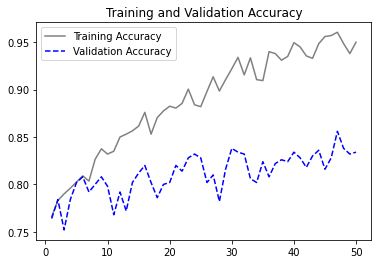

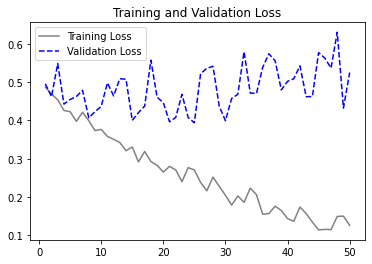

In [ ]:
accuracy = Model_5.history["accuracy"]
val_accuracy = Model_5.history["val_accuracy"]

loss = Model_5.history["loss"]
val_loss = Model_5.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_5 on test set

In [ ]:
best_model = keras.models.load_model("model5.keras")
Model5_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')

16/16 [==============================] - 1s 35ms/step - loss: 0.4446 - accuracy: 0.8600
Loss: 0.445
Accuracy: 0.860


The second model built just with 1000 training samples resulted in 71% accuracy whereas the same model with an further increase in training samples to 2000 spiked the accuracy to 86% i.e. 15% increase in the accuracy.

We aren't using rmsprop as an optimizer, RMSProp is an widely used optimizer which compensates the slow functional behaviour of AdaGrad whereas ADAM takes the best of the world i.e. Momentum and RMSProp and creates a more robust optimisation functionality to the network.

## ***Model - 6 Strides Operation with Padding being "Same" with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 (Training Sample - 2000)***

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 256)       2951

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model6.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_6 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 27s 188ms/step - loss: 0.6937 - accuracy: 0.5100 - val_loss: 0.6920 - val_accuracy: 0.5140
Epoch 2/50
63/63 [==============================] - 12s 180ms/step - loss: 0.6939 - accuracy: 0.4865 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 12s 183ms/step - loss: 0.6934 - accuracy: 0.5120 - val_loss: 0.6921 - val_accuracy: 0.5040
Epoch 4/50
63/63 [==============================] - 12s 185ms/step - loss: 0.6978 - accuracy: 0.5010 - val_loss: 0.6928 - val_accuracy: 0.5420
Epoch 5/50
63/63 [==============================] - 12s 180ms/step - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
63/63 [==============================] - 11s 173ms/step - loss: 0.6934 - accuracy: 0.5015 - val_loss: 0.6925 - val_accuracy: 0.5580
Epoch 7/50
63/63 [==============================] - 11s 167ms/step - loss: 0.6933 - accuracy: 0.5210 - val_loss: 0.6917 - val_accuracy: 0.4920

Visualizing the Training and Validation Accuracy/Loss

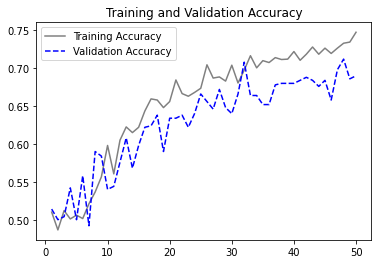

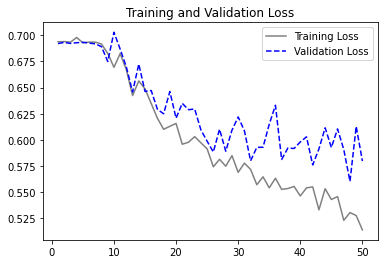

In [ ]:
accuracy = Model_6.history["accuracy"]
val_accuracy = Model_6.history["val_accuracy"]

loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_6 on test set

In [ ]:
best_model = keras.models.load_model("model6.keras")
Model6_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')

16/16 [==============================] - 1s 22ms/step - loss: 0.6084 - accuracy: 0.6500
Loss: 0.608
Accuracy: 0.650


Using Strides with Padding turned on didn't provide much of a benefit to the model, here we can see that the accuracy decreased by 21% when compared to Model 5 which was built using the Max Pooling Layer.

By optimizing the network and increasing the training sample from 1000 to 2000 we saw an increase in accuracy to 86%. 

To answer the second question we let's plot Model 5 and Model 6 to see which model is the best.

In [ ]:
Model_5 = (0.445,0.860)
Model_6 = (0.608,0.650)

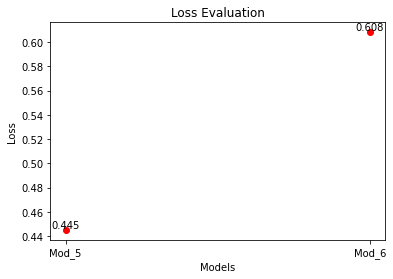

In [ ]:
Models = ("Mod_5","Mod_6")
Loss = (Model_5[0], Model_6[0])
Accuracy = (Model_5[1], Model_6[1])

plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

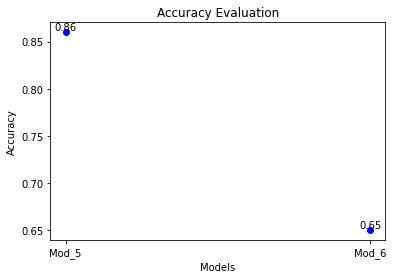

In [ ]:
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

### ***We can clearly understand from the above graphs that Model_5 is having highest accuracy amongst the models built so far i.e 86% and the least loss of 44.5%. Increasing the training sample to 2000 and providing different augmented images proved to be useful in increasing the performance of the model.***

Let's take the base model 5 and increase the training samples to 3000 and 5000 in few different models and assess the performance of those models.

## ***Training Sample - 3000***

Creating directory named cats vs dogs 1 to store the images into 3 subsets named train, validation and test

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Data Pre-Processing

Using image_dataset_from_directory to read images

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Viewing the size of the images

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Using few of the techniques such as random flip, random zoom, random rotation so as to create augmented versions of the image

In [ ]:
data_augmentation_2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

## ***Model - 7 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 (Training Sample - 3000)***

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model7.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_7 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 35s 204ms/step - loss: 0.6939 - accuracy: 0.5323 - val_loss: 0.6748 - val_accuracy: 0.6300
Epoch 2/50
94/94 [==============================] - 20s 205ms/step - loss: 0.6790 - accuracy: 0.5720 - val_loss: 0.6703 - val_accuracy: 0.5760
Epoch 3/50
94/94 [==============================] - 18s 192ms/step - loss: 0.6691 - accuracy: 0.6100 - val_loss: 0.6587 - val_accuracy: 0.5880
Epoch 4/50
94/94 [==============================] - 19s 205ms/step - loss: 0.6417 - accuracy: 0.6380 - val_loss: 0.6259 - val_accuracy: 0.6640
Epoch 5/50
94/94 [==============================] - 18s 187ms/step - loss: 0.6148 - accuracy: 0.6753 - val_loss: 0.6206 - val_accuracy: 0.6180
Epoch 6/50
94/94 [==============================] - 19s 198ms/step - loss: 0.6171 - accuracy: 0.6657 - val_loss: 0.5816 - val_accuracy: 0.6800
Epoch 7/50
94/94 [==============================] - 18s 188ms/step - loss: 0.5855 - accuracy: 0.6920 - val_loss: 0.5823 - val_accuracy: 0.7060

Visualizing the Training and Validation Accuracy/Loss

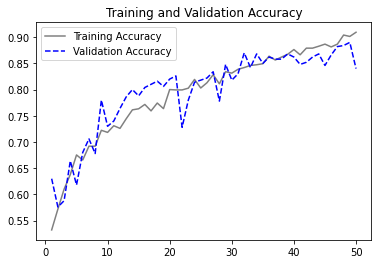

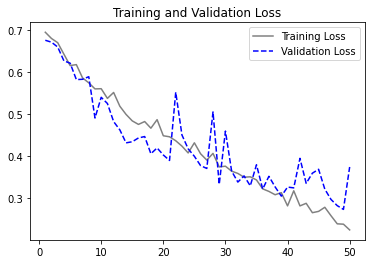

In [ ]:
accuracy = Model_7.history["accuracy"]
val_accuracy = Model_7.history["val_accuracy"]

loss = Model_7.history["loss"]
val_loss = Model_7.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_7 on test set

In [ ]:
best_model = keras.models.load_model("model7.keras")
Model7_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model7_Results[0]:.3f}')
print(f'Accuracy: {Model7_Results[1]:.3f}')

16/16 [==============================] - 1s 39ms/step - loss: 0.4954 - accuracy: 0.8180
Loss: 0.495
Accuracy: 0.818


In the earlier models i.e. Model 6 we did try to use strides instead of max pooling which wasn't that great. So we are trying to use a combination of both so as to assess the performance of this model.

MaxPooling is an pooling operation which is performed to downsample the size of the feature map to reduce the spatial size. Strides on the other hand determines the step rate of the sliding window that is used to learn the features of the data.

## ***Model - 8 MaxPooling + Strides of Step-Size 2 Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 (Training Sample - 3000)***

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model8.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_8 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 24s 197ms/step - loss: 0.6928 - accuracy: 0.5123 - val_loss: 0.6880 - val_accuracy: 0.5520
Epoch 2/50
94/94 [==============================] - 19s 202ms/step - loss: 0.6844 - accuracy: 0.5497 - val_loss: 0.6653 - val_accuracy: 0.6140
Epoch 3/50
94/94 [==============================] - 18s 191ms/step - loss: 0.6727 - accuracy: 0.5743 - val_loss: 0.6462 - val_accuracy: 0.6060
Epoch 4/50
94/94 [==============================] - 19s 200ms/step - loss: 0.6616 - accuracy: 0.6067 - val_loss: 0.6591 - val_accuracy: 0.6420
Epoch 5/50
94/94 [==============================] - 18s 187ms/step - loss: 0.6496 - accuracy: 0.6350 - val_loss: 0.6863 - val_accuracy: 0.5580
Epoch 6/50
94/94 [==============================] - 19s 199ms/step - loss: 0.6489 - accuracy: 0.6263 - val_loss: 0.6608 - val_accuracy: 0.6720
Epoch 7/50
94/94 [==============================] - 19s 204ms/step - loss: 0.6347 - accuracy: 0.6570 - val_loss: 0.5936 - val_accuracy: 0.6840

Visualizing the Training and Validation Accuracy/Loss

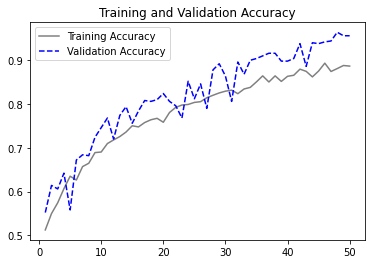

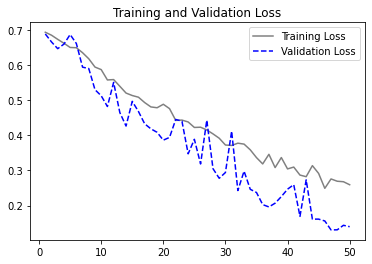

In [ ]:
accuracy = Model_8.history["accuracy"]
val_accuracy = Model_8.history["val_accuracy"]

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_8 on test set

In [ ]:
best_model = keras.models.load_model("model8.keras")
Model8_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model8_Results[0]:.3f}')
print(f'Accuracy: {Model8_Results[1]:.3f}')

16/16 [==============================] - 1s 29ms/step - loss: 0.4247 - accuracy: 0.8560
Loss: 0.425
Accuracy: 0.856


## ***Model - 9 MaxPooling + Strides of Step-Size 2 with Padding turned on Operation with Increase in filters from 32 to 512 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 (Training Sample - 3000)***

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model9.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_9 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 24s 198ms/step - loss: 0.6953 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
94/94 [==============================] - 19s 198ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/50
94/94 [==============================] - 19s 200ms/step - loss: 0.6940 - accuracy: 0.5077 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
94/94 [==============================] - 19s 197ms/step - loss: 0.6933 - accuracy: 0.5053 - val_loss: 0.6886 - val_accuracy: 0.5440
Epoch 5/50
94/94 [==============================] - 19s 203ms/step - loss: 0.6929 - accuracy: 0.5220 - val_loss: 0.6824 - val_accuracy: 0.5680
Epoch 6/50
94/94 [==============================] - 18s 192ms/step - loss: 0.6922 - accuracy: 0.5133 - val_loss: 0.6852 - val_accuracy: 0.5340
Epoch 7/50
94/94 [==============================] - 19s 201ms/step - loss: 0.6829 - accuracy: 0.5533 - val_loss: 0.6661 - val_accuracy: 0.5960

Visualizing the Training and Validation Accuracy/Loss

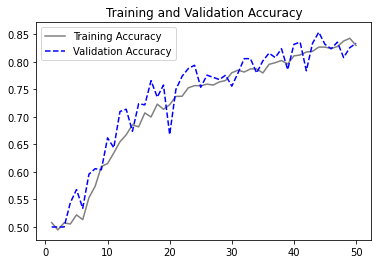

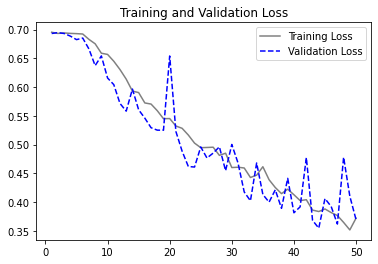

In [ ]:
accuracy = Model_9.history["accuracy"]
val_accuracy = Model_9.history["val_accuracy"]

loss = Model_9.history["loss"]
val_loss = Model_9.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_9 on test set

In [ ]:
best_model = keras.models.load_model("model9.keras")
Model9_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model9_Results[0]:.3f}')
print(f'Accuracy: {Model9_Results[1]:.3f}')

16/16 [==============================] - 1s 29ms/step - loss: 0.5513 - accuracy: 0.7820
Loss: 0.551
Accuracy: 0.782


Let's see which of the models have best performance when the training sample was set to 3000. Note: Here models 8 and 9 were trained differently with strides being used with maxpooling and strides being used with maxpooling and padding turned on.

In [21]:
Model_7 = (0.495,0.818)
Model_8 = (0.425,0.856)
Model_9 = (0.551,0.782)

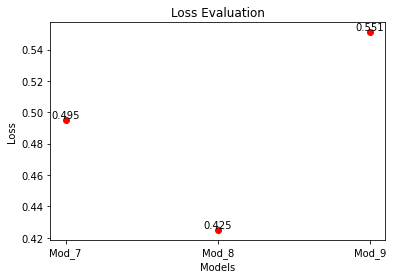

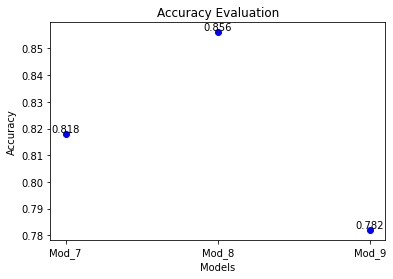

In [22]:
Models = ("Mod_7","Mod_8","Mod_9")
Loss = (Model_7[0], Model_8[0],Model_9[0])
Accuracy = (Model_7[1], Model_8[1],Model_9[1])

# Loss Evaluation
plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

# Accuracy Evaluation
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

Here we can clearly see that the model which was built with 5 layers using maxpooling along with strides was giving the highest accuracy i.e. 85.6 % with least loss amongst the other 2 models i.e. 42.5%.

Now, we are increasing the training sample to 5000 and building a model from scratch to check it's performance on the unseen data.

## ***Training Sample - 5000***

Creating directory named cats vs dogs 2 to store the images into 3 subsets named train, validation and test

In [8]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Data Pre-Processing

Using image_dataset_from_directory to read images

In [9]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Viewing the size of the images

In [10]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Using few of the techniques such as random flip, random zoom, random rotation so as to create augmented versions of the image

In [11]:
data_augmentation_3 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

## ***Model - 10 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 (Training Sample - 5000)***

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_3(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model10.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_10 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
157/157 [==============================] - 63s 295ms/step - loss: 0.6933 - accuracy: 0.5196 - val_loss: 0.6907 - val_accuracy: 0.5160
Epoch 2/50
157/157 [==============================] - 37s 234ms/step - loss: 0.6877 - accuracy: 0.5444 - val_loss: 0.6707 - val_accuracy: 0.6160
Epoch 3/50
157/157 [==============================] - 38s 235ms/step - loss: 0.6701 - accuracy: 0.5834 - val_loss: 0.7211 - val_accuracy: 0.5420
Epoch 4/50
157/157 [==============================] - 40s 255ms/step - loss: 0.6576 - accuracy: 0.6182 - val_loss: 0.6362 - val_accuracy: 0.6500
Epoch 5/50
157/157 [==============================] - 31s 197ms/step - loss: 0.6356 - accuracy: 0.6378 - val_loss: 0.6122 - val_accuracy: 0.6600
Epoch 6/50
157/157 [==============================] - 31s 193ms/step - loss: 0.6234 - accuracy: 0.6598 - val_loss: 0.5737 - val_accuracy: 0.6840
Epoch 7/50
157/157 [==============================] - 33s 207ms/step - loss: 0.6023 - accuracy: 0.6836 - val_loss: 0.5608 - val_ac

Visualizing the Training and Validation Accuracy/Loss

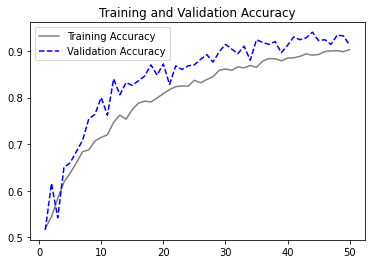

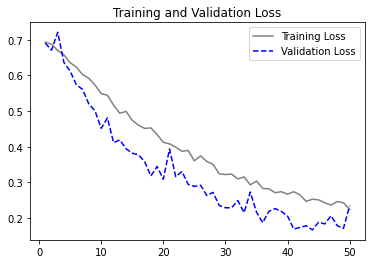

In [ ]:
accuracy = Model_10.history["accuracy"]
val_accuracy = Model_10.history["val_accuracy"]

loss = Model_10.history["loss"]
val_loss = Model_10.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of Model_10 on test set

In [ ]:
best_model = keras.models.load_model("model10.keras")
Model10_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model10_Results[0]:.3f}')
print(f'Accuracy: {Model10_Results[1]:.3f}')

16/16 [==============================] - 1s 37ms/step - loss: 0.1825 - accuracy: 0.9200
Loss: 0.182
Accuracy: 0.920


### ***For answering the third question we built 4 models, 3 models with 3000 as training sample where the best model was resulting in 85.6% Accuracy whereas when we increase the training sample from 3000 to 5000 we saw an increase in accuracy to 92%. So by this we are answering the third question and can comment that the best training sample to amplify the performance of the model is 5000.***

Probable reason for the validation loss to be lower than the training loss can be the split strategy used, here the training sample is nearly as large as 5000 whereas the validation and test are constant from the start at 500 each. It is also must to note that during training the regularisation has a huge hold, i.e. dropout or l1, l2 regularizers are included during computing the training loss whereas during validation or test the regularizer is disabled, so likely the loss can be a lower to the training loss.

## ***Leveraging a Pre-Trained Model - VGG16***

## ***VGG - Model 1 (1000 Training Samples)***

Initiating the VGG16 Conv Net

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 2s 0us/step


Summary of the Model

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Extracting the VGG 16 Features and Labels

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 24ms/step


In [ ]:
train_features.shape

(1000, 5, 5, 512)

## ***VGG - Model 1 Dense Layer with 256 Nodes and Droput Rate of 0.5 and optimizer being rmsprop with the Original Images***

In [ ]:
# Defining and Training the densely connected classifier 
# The last dense stacked layer and the classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)


# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath="vgg_model1.keras",
            save_best_only=True,
            monitor="val_loss")


# Model Fit
VGG_Model_1 = model.fit(
              train_features, train_labels,
              epochs= 30,
              validation_data= (val_features, val_labels),
              callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 2s 20ms/step - loss: 33.4363 - accuracy: 0.9020 - val_loss: 17.7934 - val_accuracy: 0.9060
Epoch 2/30
32/32 [==============================] - 0s 10ms/step - loss: 4.8357 - accuracy: 0.9730 - val_loss: 5.2915 - val_accuracy: 0.9640
Epoch 3/30
32/32 [==============================] - 0s 9ms/step - loss: 1.3187 - accuracy: 0.9850 - val_loss: 6.3005 - val_accuracy: 0.9480
Epoch 4/30
32/32 [==============================] - 0s 7ms/step - loss: 1.5558 - accuracy: 0.9880 - val_loss: 10.7682 - val_accuracy: 0.9400
Epoch 5/30
32/32 [==============================] - 0s 10ms/step - loss: 0.9742 - accuracy: 0.9940 - val_loss: 3.8362 - val_accuracy: 0.9720
Epoch 6/30
32/32 [==============================] - 0s 8ms/step - loss: 1.0695 - accuracy: 0.9940 - val_loss: 5.1483 - val_accuracy: 0.9680
Epoch 7/30
32/32 [==============================] - 0s 8ms/step - loss: 0.3139 - accuracy: 0.9970 - val_loss: 7.2058 - val_accuracy: 0.9660
Epoch 8/30
32/

Plotting the Training and Validation Accuracy/Loss

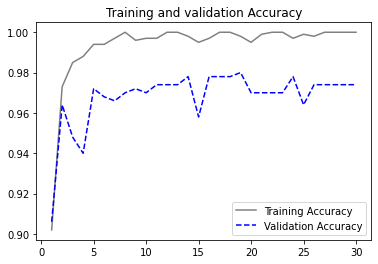

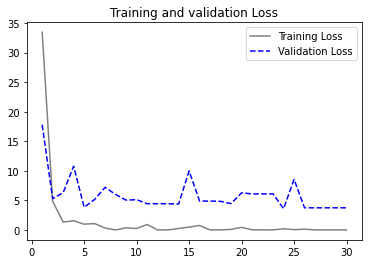

In [ ]:
acc = VGG_Model_1.history["accuracy"]
val_acc = VGG_Model_1.history["val_accuracy"]

loss = VGG_Model_1.history["loss"]
val_loss = VGG_Model_1.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

Evaluating VGG_Model_1 on test set

In [ ]:
best_model = keras.models.load_model("vgg_model1.keras")
VGG_Model_1_Results = best_model.evaluate(test_features,test_labels)
print(f'Loss: {VGG_Model_1_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_1_Results[1]:.3f}')

16/16 [==============================] - 0s 3ms/step - loss: 12.3502 - accuracy: 0.9560
Loss: 12.350
Accuracy: 0.956


## ***VGG - Model 2***

In [ ]:
conv_base= keras.applications.vgg16.VGG16(
           weights="imagenet",
           include_top=False)

conv_base.trainable = False

We are setting the pre-trained model to not update it's weights during the training, we are only setting the densely connected networks and the classifier to update it's weights during the training.

By doing so, we will be avoiding overfitting since the pre-trained model doesn't learn during the training and also it is useful to set the pre-trained model training to false when we have less training data and low computational power.

Printing the list of trainable weights before and after freezing

In [ ]:
# Before Freezing
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
# After Freezing
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


By setting the conv_base.trainable to False we froze the trainable weights on the VGG16 architecture.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## ***VGG - Model 2 Dense Layer with 256 Nodes and Droput Rate of 0.5 and optimizer being rmsprop with the Augmented Images***

Adding a data augmentation stage to provide augmented training samples and a classifier to the convolutional base

In [ ]:
# Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

In [ ]:
# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_2 = model.fit(
              train_dataset,
              epochs= 30,
              validation_data=validation_dataset,
              callbacks=callbacks)

Epoch 1/30
32/32 [==============================] - 13s 299ms/step - loss: 26.7969 - accuracy: 0.8690 - val_loss: 2.2725 - val_accuracy: 0.9760
Epoch 2/30
32/32 [==============================] - 9s 281ms/step - loss: 5.7167 - accuracy: 0.9480 - val_loss: 12.2416 - val_accuracy: 0.9200
Epoch 3/30
32/32 [==============================] - 9s 285ms/step - loss: 6.9503 - accuracy: 0.9510 - val_loss: 2.9741 - val_accuracy: 0.9800
Epoch 4/30
32/32 [==============================] - 9s 283ms/step - loss: 2.9454 - accuracy: 0.9690 - val_loss: 7.8131 - val_accuracy: 0.9600
Epoch 5/30
32/32 [==============================] - 10s 298ms/step - loss: 3.9463 - accuracy: 0.9610 - val_loss: 14.8371 - val_accuracy: 0.9200
Epoch 6/30
32/32 [==============================] - 9s 270ms/step - loss: 2.9451 - accuracy: 0.9800 - val_loss: 5.1446 - val_accuracy: 0.9700
Epoch 7/30
32/32 [==============================] - 9s 290ms/step - loss: 2.5958 - accuracy: 0.9800 - val_loss: 3.0464 - val_accuracy: 0.9760
E

Plotting the Training and Validation Accuracy/Loss

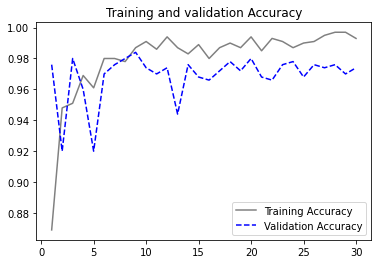

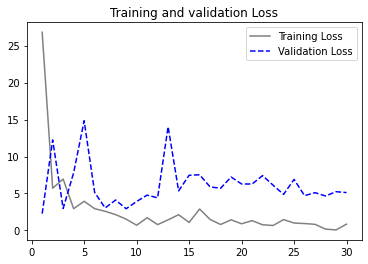

In [ ]:
acc = VGG_Model_2.history["accuracy"]
val_acc = VGG_Model_2.history["val_accuracy"]

loss = VGG_Model_2.history["loss"]
val_loss = VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

Evaluating VGG_Model_2 on test set

In [ ]:
best_model = keras.models.load_model("vgg_model2.keras")
VGG_Model_2_Results= best_model.evaluate(test_dataset)
print(f'Loss: {VGG_Model_2_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_2_Results[1]:.3f}')

16/16 [==============================] - 2s 99ms/step - loss: 5.1108 - accuracy: 0.9580
Loss: 5.111
Accuracy: 0.958


## ***Fine Tuning the VGG_Model_2***

Freezing all layers until the fourth from the last



In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

It must be kept in mind that the pre-trained networks are not just used for a single image classificaiton purposed they are generally trained to classify and work on different use cases.

Initial layers captures the general features and later feature are more specific to the problem which we deal.

By freezing the initial layers we are generally avoiding overfitting and thereby allowing the model to learn more and more things which is specific to our classification task.

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model2.keras",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_2 = model.fit(
                        train_dataset,
                        epochs=30,
                        validation_data=validation_dataset,
                        callbacks=callbacks)

Epoch 1/30
32/32 [==============================] - 15s 300ms/step - loss: 0.5607 - accuracy: 0.9940 - val_loss: 3.9200 - val_accuracy: 0.9780
Epoch 2/30
32/32 [==============================] - 10s 301ms/step - loss: 0.2457 - accuracy: 0.9960 - val_loss: 3.7473 - val_accuracy: 0.9780
Epoch 3/30
32/32 [==============================] - 10s 293ms/step - loss: 2.4852e-16 - accuracy: 1.0000 - val_loss: 3.7473 - val_accuracy: 0.9780
Epoch 4/30
32/32 [==============================] - 9s 287ms/step - loss: 0.4104 - accuracy: 0.9950 - val_loss: 3.5153 - val_accuracy: 0.9760
Epoch 5/30
32/32 [==============================] - 9s 284ms/step - loss: 0.1390 - accuracy: 0.9990 - val_loss: 3.5397 - val_accuracy: 0.9800
Epoch 6/30
32/32 [==============================] - 9s 287ms/step - loss: 0.6059 - accuracy: 0.9960 - val_loss: 3.1622 - val_accuracy: 0.9760
Epoch 7/30
32/32 [==============================] - 10s 283ms/step - loss: 0.0933 - accuracy: 0.9990 - val_loss: 3.9232 - val_accuracy: 0.976

Plotting Training and Validation Accuracy/Loss

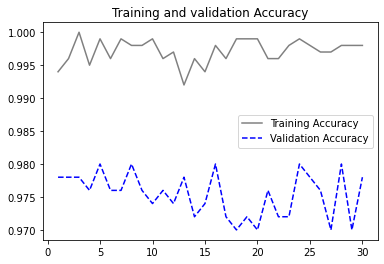

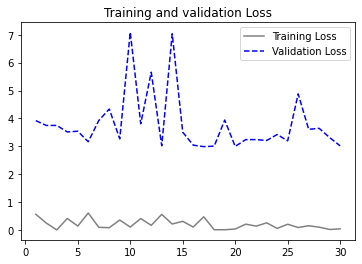

In [ ]:
acc = FineTuned_VGG_Model_2.history["accuracy"]
val_acc = FineTuned_VGG_Model_2.history["val_accuracy"]

loss = FineTuned_VGG_Model_2.history["loss"]
val_loss = FineTuned_VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

Evaluating FineTuned_VGG_Model_2 on test set

In [ ]:
best_model = keras.models.load_model("fine_tuning_vgg_model2.keras")
FineTuned_VGG_Model_2_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_2_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_2_Results[1]:.3f}")

16/16 [==============================] - 2s 95ms/step - loss: 9.0846 - accuracy: 0.9660
Loss: 9.085
Accuracy: 0.966


### ***Above we have built 3 models using the pre-trained network i.e. vgg16, we saw that by not letting the pre-trained network to update it's weights during the training and nextly by freezing the first few layers of the pre-trained network we are getting higher accuracy, so we are going to do the same i.e. build two models with 5000 training samples.***

## ***VGG - Model 3 (5000 Training Samples)***

Not letting the pre-trained network update it's weights during the training.

In [12]:
conv_base= keras.applications.vgg16.VGG16(
           weights="imagenet",
           include_top=False)

conv_base.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Using image_dataset_from_directory to read images

In [16]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


## ***VGG - Model 3 Dense Layer with 256 Nodes and Droput Rate of 0.5 and optimizer being adam with the augmented Images***

In [15]:
# Data Augmentation
data_augmentation_4 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_4(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model3.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_3 = model.fit(
              train_dataset,
              epochs= 50,
              validation_data=validation_dataset,
              callbacks=callbacks)

Epoch 1/50
157/157 [==============================] - 75s 376ms/step - loss: 10.3039 - accuracy: 0.9190 - val_loss: 1.4262 - val_accuracy: 0.9820
Epoch 2/50
157/157 [==============================] - 54s 342ms/step - loss: 6.9685 - accuracy: 0.9458 - val_loss: 0.5622 - val_accuracy: 0.9900
Epoch 3/50
157/157 [==============================] - 40s 255ms/step - loss: 5.1351 - accuracy: 0.9514 - val_loss: 0.3403 - val_accuracy: 0.9940
Epoch 4/50
157/157 [==============================] - 39s 246ms/step - loss: 3.0031 - accuracy: 0.9576 - val_loss: 0.8382 - val_accuracy: 0.9880
Epoch 5/50
157/157 [==============================] - 39s 245ms/step - loss: 2.2206 - accuracy: 0.9588 - val_loss: 0.9351 - val_accuracy: 0.9820
Epoch 6/50
157/157 [==============================] - 39s 246ms/step - loss: 1.3383 - accuracy: 0.9612 - val_loss: 0.7091 - val_accuracy: 0.9840
Epoch 7/50
157/157 [==============================] - 39s 249ms/step - loss: 0.8157 - accuracy: 0.9678 - val_loss: 0.3453 - val_a

Visualizing the training and validation Accuracy/Loss

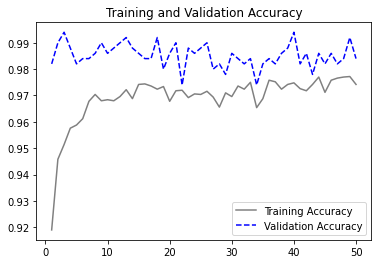

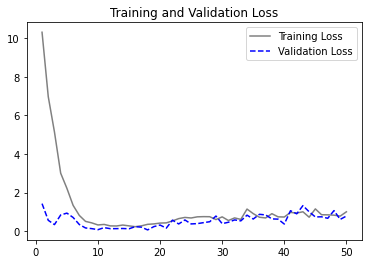

In [17]:
acc = VGG_Model_3.history["accuracy"]
val_acc = VGG_Model_3.history["val_accuracy"]

loss = VGG_Model_3.history["loss"]
val_loss = VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Evaluating the performance of VGG_Model_3 on test set

In [18]:
best_model = keras.models.load_model("vgg_model3.keras")
VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {VGG_Model_3_Results[1]:.3f}")

16/16 [==============================] - 2s 93ms/step - loss: 0.2359 - accuracy: 0.9860
Loss: 0.236
Accuracy: 0.986


## ***Fine Tunning VGG_Model_3 (Training Samples - 5000)***

Here we are trying to optimize the VGG_Model3 by freezing the initial 4 layers so that the model doesn't overfit and learns only the features specific to our classification task.

So here the pre-trained layer's are set to not update during the training and also the initial 4 layers are set to be freezed, these are the optimisations being used in here so as to achieve better performance with 5000 training samples.

In [19]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

Fine Tunning VGG_Model_3

In [20]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model3.keras",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_3 = model.fit(
                        train_dataset,
                        epochs=50,
                        validation_data=validation_dataset,
                        callbacks=callbacks)

Epoch 1/50
157/157 [==============================] - 62s 351ms/step - loss: 0.6453 - accuracy: 0.9784 - val_loss: 0.8518 - val_accuracy: 0.9820
Epoch 2/50
157/157 [==============================] - 52s 330ms/step - loss: 0.3256 - accuracy: 0.9838 - val_loss: 0.5575 - val_accuracy: 0.9880
Epoch 3/50
157/157 [==============================] - 48s 301ms/step - loss: 0.3173 - accuracy: 0.9822 - val_loss: 0.7828 - val_accuracy: 0.9820
Epoch 4/50
157/157 [==============================] - 46s 290ms/step - loss: 0.3150 - accuracy: 0.9848 - val_loss: 0.5674 - val_accuracy: 0.9860
Epoch 5/50
157/157 [==============================] - 41s 257ms/step - loss: 0.2841 - accuracy: 0.9860 - val_loss: 0.6796 - val_accuracy: 0.9880
Epoch 6/50
157/157 [==============================] - 41s 259ms/step - loss: 0.1831 - accuracy: 0.9864 - val_loss: 0.3928 - val_accuracy: 0.9940
Epoch 7/50
157/157 [==============================] - 41s 261ms/step - loss: 0.1547 - accuracy: 0.9882 - val_loss: 0.3289 - val_ac

Visualizing the training and validation Accuracy/Loss

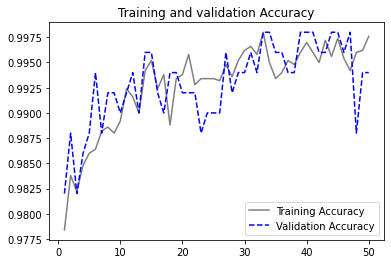

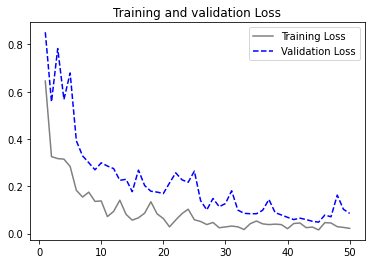

In [23]:
acc = FineTuned_VGG_Model_3.history["accuracy"]
val_acc = FineTuned_VGG_Model_3.history["val_accuracy"]

loss = FineTuned_VGG_Model_3.history["loss"]
val_loss = FineTuned_VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

Evaluating the performance of FineTuned_VGG_Model_3 on test set

In [24]:
best_model = keras.models.load_model("fine_tuning_vgg_model3.keras")
FineTuned_VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_3_Results[1]:.3f}")

16/16 [==============================] - 2s 93ms/step - loss: 0.0829 - accuracy: 0.9940
Loss: 0.083
Accuracy: 0.994


Now, since we have all the models built, in total 15 models where 2 models were just used as a fine tuned version of the previous models.

We are trying to compare now which of the models were the best performer, in two categories i.e. Scratch Models vs Pre-Trained Models

Let's evaluate the best model from scratch, in total comparing the loss and accuracy of 10 models built with 4 different training samples, main ideology is to find the optimal training sample for the cats and dogs classification task.

In [25]:
# Scratch Models
Model_1 = (0.645, 0.614)
Model_2 = (0.601, 0.712)
Model_3 = (0.609,0.692)
Model_4 = (0.666, 0.652)
Model_5 = (0.445,0.860)
Model_6 = (0.608,0.650)
Model_7 = (0.495,0.818)
Model_8 = (0.425,0.856)
Model_9 = (0.551,0.782)
Model_10 = (0.182,0.920)

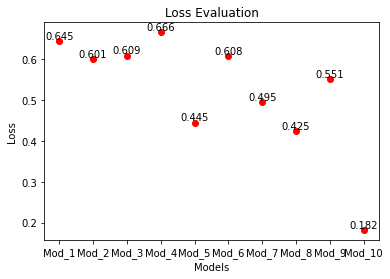

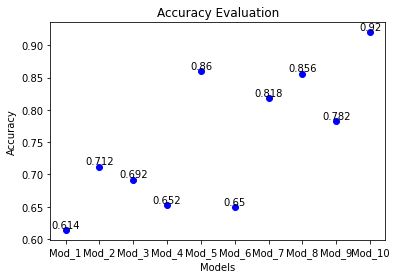

In [26]:
Models = ("Mod_1","Mod_2","Mod_3","Mod_4","Mod_5","Mod_6","Mod_7","Mod_8","Mod_9","Mod_10")
Loss = (Model_1[0], Model_2[0],Model_3[0],Model_4[0],Model_5[0],Model_6[0],Model_7[0],Model_8[0],Model_9[0],Model_10[0])
Accuracy = (Model_1[1], Model_2[1],Model_3[1],Model_4[1],Model_5[1],Model_6[1],Model_7[1],Model_8[1],Model_9[1],Model_10[1])

# Loss Evaluation
plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

# Accuracy Evaluation
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

### ***When it comes to the scratch models, Model_10 with 5000 Training Samples deemed to be the best model with 92% Accuracy and 18% loss on the test set. Model_10 was built using 5 layers ranging the filters size from 32 to 256 with maxpooling layer and dropout rate of 0.5 with the augmented images being used.***

Next we built 5 models using the pre-trained vgg16 network, the first 3 were built using 1000 as sample and rmsprop as optimizer and the next 2 where built using 5000 as sample size and adam as optimizer.

In [27]:
# Pre-Trained Models
VGG_Model_1 = (12.350,0.956)
VGG_Model_2 = (5.111,0.958)
FineTuned_VGG_Model_2 = (9.085,0.966)
VGG_Model_3 = (0.236,0.986)
FineTuned_VGG_Model_3 = (0.083,0.994)

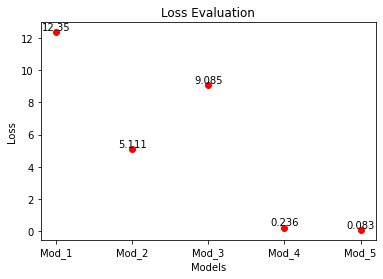

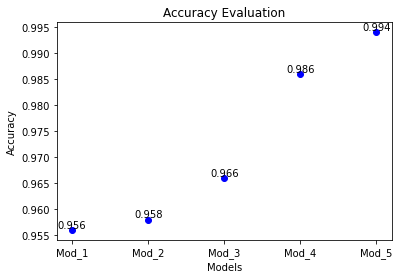

In [28]:
Models = ("Mod_1","Mod_2","Mod_3","Mod_4","Mod_5")
Loss = (VGG_Model_1[0], VGG_Model_2[0],FineTuned_VGG_Model_2[0],VGG_Model_3[0],FineTuned_VGG_Model_3[0])
Accuracy = (VGG_Model_1[1], VGG_Model_2[1],FineTuned_VGG_Model_2[1],VGG_Model_3[1],FineTuned_VGG_Model_3[1])

# Loss Evaluation
plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

# Accuracy Evaluation
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

### ***Here, when it comes to the pre-trained models we get to see that Mod_5 i.e. FineTuned_VGG_Model_3 deemed to be the best model where the Accuracy is 99.4% and the Loss being 8.3%. This model was built using 5000 training samples and adam being the optimiser with a learning rate of 0.000001.***

### ***In both the cases i.e. Scratch Models and Pre-Trained Models the best performing models where the models that were trained using 5000 Training Samples and the models with the optimizer being Adam.***

### ***There exists a strong relationship between the Trainig Sample and the choice of network, in my opinion if the model gets to view more samples it gets to train much more efficiently and it understand the characteristic of the image which it is is trying to classify, here in our case it is Cats vs Dogs.***

### ***When it comes to the models which were built from scratch, the models which used adam as the optimizer and maxpooling with pooling size of 2 resulted to be the best models with varied sample sizes. In order to optimize these networks I did try to add a dropout rate of 0.5 and also to provide more samples used augmented images which also resulted in pretty good increase in the accuracy on the unseen data.***

### ***In the similar way adam being used along with dropout rate and augmented images thus helped the pre-trained network to optimize well, we also didn't allow the pre-trained model to change it's weights during training which helped the model to avoid nose in the data and also by freezing the inital 4 layers we are more speicifically forcing the model to focus on the current classification task of cats vs dogs in specific.***